## Housing Price Prediction for Ames, Iowa

### The following is an assignment for my Predictive Analytics class where I clean data, perform EDA, build and validate then compare ML models using Linear regression, Ridge Regression, Lasso Regression, Elastic Net

The dataset used is housing data from Ames, Iowa.

Import standard packages for machine learning

In [1]:
#Add packages
#These are my standard packages to load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 	Read in ames.csv file into a data frame and call it Ames

In [2]:
Ames=pd.read_csv(r"C:\Users\17857\OneDrive\Desktop\Predictive Analytics\AmesHousing.csv")

## 	Explore the dimensions and structures of the data frame. Check to see if there are missing values

In [3]:
Ames.shape

(2930, 82)

In [4]:
# view the dataset
Ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
#using head for data view
Ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
#using tail to view data
Ames.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [7]:
Ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Edit column names and drop uneeded columns to make data easier to work with

In [8]:
#Remove the PID column. It is uneccesary so do not have to deal with it
#Note: axis=1 denotes that we are referring to a column, not a row
Ames=Ames.drop('PID',axis=1)
Ames.head(5)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
#Remove the Order column. It is just the observation number so do not have to deal with it
#Note: axis=1 denotes that we are referring to a column, not a row
Ames=Ames.drop('Order',axis=1)
Ames.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
# Rename columns
Ames.rename(columns={'1st Flr SF':'FirstFlrSF'},inplace=True)
Ames.rename(columns={'2nd Flr SF':'SecondFlrSF'},inplace=True)
Ames.rename(columns={'3Ssn Porch':'ThreeSeasonPorch'},inplace=True)

Bring the target variable to the front of the dataset. SalePrice is the target variable

In [11]:
# designate target variable name & move it to the front of the dataframe
targetName = 'SalePrice'
targetSeries = Ames[targetName] 
#remove target from current location and insert in column number 0
del Ames[targetName]
Ames.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
Ames.head(5)

,SalePrice,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,215000,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,105000,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,172000,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,189900,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


Check to see if there are missing values

In [12]:
#Check columns with missing values
Ames.columns[Ames.isnull().any()].tolist() # There are 27 columns with missing values

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

There are 27 columns with missing values

There are many missing values among the 27 columns

In [13]:
#Check to see how many missing values there are
nulls = pd.DataFrame(Ames.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls # There are many missing values among the 27 columns

,Null Count
Feature,
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Fireplace Qu,1422
...,...
FirstFlrSF,0
Central Air,0
Heating QC,0


## 	Replace any missing values with the mean value of the variable (feature).

In [14]:
#Replace any missing values with the mean value
Ames=Ames.fillna(Ames.mean())

In [15]:
#Check columns with missing values
Ames.columns[Ames.isnull().any()].tolist() # There are still 16 columns with missing values

['Alley',
 'Mas Vnr Type',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Electrical',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

Create a df with the sill missing columns and check dtypes. The only columns still missing values are categorical data. They can not be filled with a mean. This will be handled with dummy variables in a later step

In [16]:
#Create a df with the sill missing columns and check dtypes. #The still missing columns are categorical. This will be handled with dummy variables in a later step
Amesstillmissing=Ames[['Alley','Mas Vnr Type','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
 'Electrical','Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Pool QC','Fence','Misc Feature']]
Amesstillmissing.dtypes 

Alley             object
Mas Vnr Type      object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Electrical        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Pool QC           object
Fence             object
Misc Feature      object
dtype: object

##	Perform correlation analysis on the integer/float attributes. Make a visualization of the correlation matrix. Comment on the outputs.

In order to perfrom this correlation analysis on the numeric variables they will need to be seperated from the categorical variables

In [17]:
#Find the numeric attributes and create a DF for corr analysis
numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64']
Amesnum = Ames.select_dtypes(include=numerics) # create DF
print("Column Names", Amesnum.columns) #Check columns

Column Names Index(['SalePrice', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'FirstFlrSF', 'SecondFlrSF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', 'ThreeSeasonPorch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')


In [18]:
#Check Shape
Amesnum.shape

(2930, 37)

In [19]:
#Check for numeric datatypes
Amesnum.dtypes

SalePrice             int64
MS SubClass           int64
Lot Frontage        float64
Lot Area              int64
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remod/Add        int64
Mas Vnr Area        float64
BsmtFin SF 1        float64
BsmtFin SF 2        float64
Bsmt Unf SF         float64
Total Bsmt SF       float64
FirstFlrSF            int64
SecondFlrSF           int64
Low Qual Fin SF       int64
Gr Liv Area           int64
Bsmt Full Bath      float64
Bsmt Half Bath      float64
Full Bath             int64
Half Bath             int64
Bedroom AbvGr         int64
Kitchen AbvGr         int64
TotRms AbvGrd         int64
Fireplaces            int64
Garage Yr Blt       float64
Garage Cars         float64
Garage Area         float64
Wood Deck SF          int64
Open Porch SF         int64
Enclosed Porch        int64
ThreeSeasonPorch      int64
Screen Porch          int64
Pool Area             int64
Misc Val              int64
Mo Sold             

I also wanted to go ahead and create a dataframe for the categorical variables just to make sure the shape adds up to 80 variables and there are no missing numerics

In [20]:
#Find categorical attributes and create dataframe
categoricals = ['object']
Amescat = Ames.select_dtypes(include=categoricals)#create dataframe
print("Column Names", Amescat.columns)#Check columns

Column Names Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [21]:
#Check shape make sure it adds up to 80 variables. It does
Amescat.shape

(2930, 43)

In [22]:
#Check datatypes
Amescat.dtypes

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


Now I have split my numerical and categorical variables into two seperate dataframes to work with

### Perform correlation analysis on the integer/float attributes

In [23]:
Ames_corr_matrix=Amesnum.corr()
Ames_corr_matrix

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,ThreeSeasonPorch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
SalePrice,1.000000,-0.085092,0.340751,0.266549,0.799262,-0.101697,0.558426,0.532974,0.505784,0.432794,...,0.640385,0.327143,0.312951,-0.128787,0.032225,0.112151,0.068403,-0.015691,0.035259,-0.030569
MS SubClass,-0.085092,1.000000,-0.392019,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002724,-0.060067,...,-0.103237,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905
Lot Frontage,0.340751,-0.392019,1.000000,0.365503,0.198900,-0.067383,0.115688,0.085744,0.203383,0.199946,...,0.337700,0.104632,0.150426,0.011685,0.025501,0.070084,0.160698,0.035926,0.010177,-0.006921
Lot Area,0.266549,-0.204613,0.365503,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126586,0.191546,...,0.212821,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085
Overall Qual,0.799262,0.039419,0.198900,0.097188,1.000000,-0.094812,0.597027,0.569609,0.427470,0.284011,...,0.563445,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719
Overall Cond,-0.101697,-0.067349,-0.067383,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135088,-0.050920,...,-0.153750,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207
Year Built,0.558426,0.036579,0.115688,0.023258,0.597027,-0.368773,1.000000,0.612095,0.311828,0.279836,...,0.479922,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197
Year Remod/Add,0.532974,0.043397,0.085744,0.021682,0.569609,0.047680,0.612095,1.000000,0.196170,0.151720,...,0.376406,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652
Mas Vnr Area,0.505784,0.002724,0.203383,0.126586,0.427470,-0.135088,0.311828,0.196170,1.000000,0.300396,...,0.372265,0.165108,0.142766,-0.110447,0.013778,0.065622,0.004617,0.044932,-0.000275,-0.017665
BsmtFin SF 1,0.432794,-0.060067,0.199946,0.191546,0.284011,-0.050920,0.279836,0.151720,0.300396,1.000000,...,0.309831,0.223989,0.124937,-0.100453,0.050541,0.095873,0.084140,0.092886,-0.001155,0.022397


### Make a visualization of the correlation matrix. Comment on the outputs.

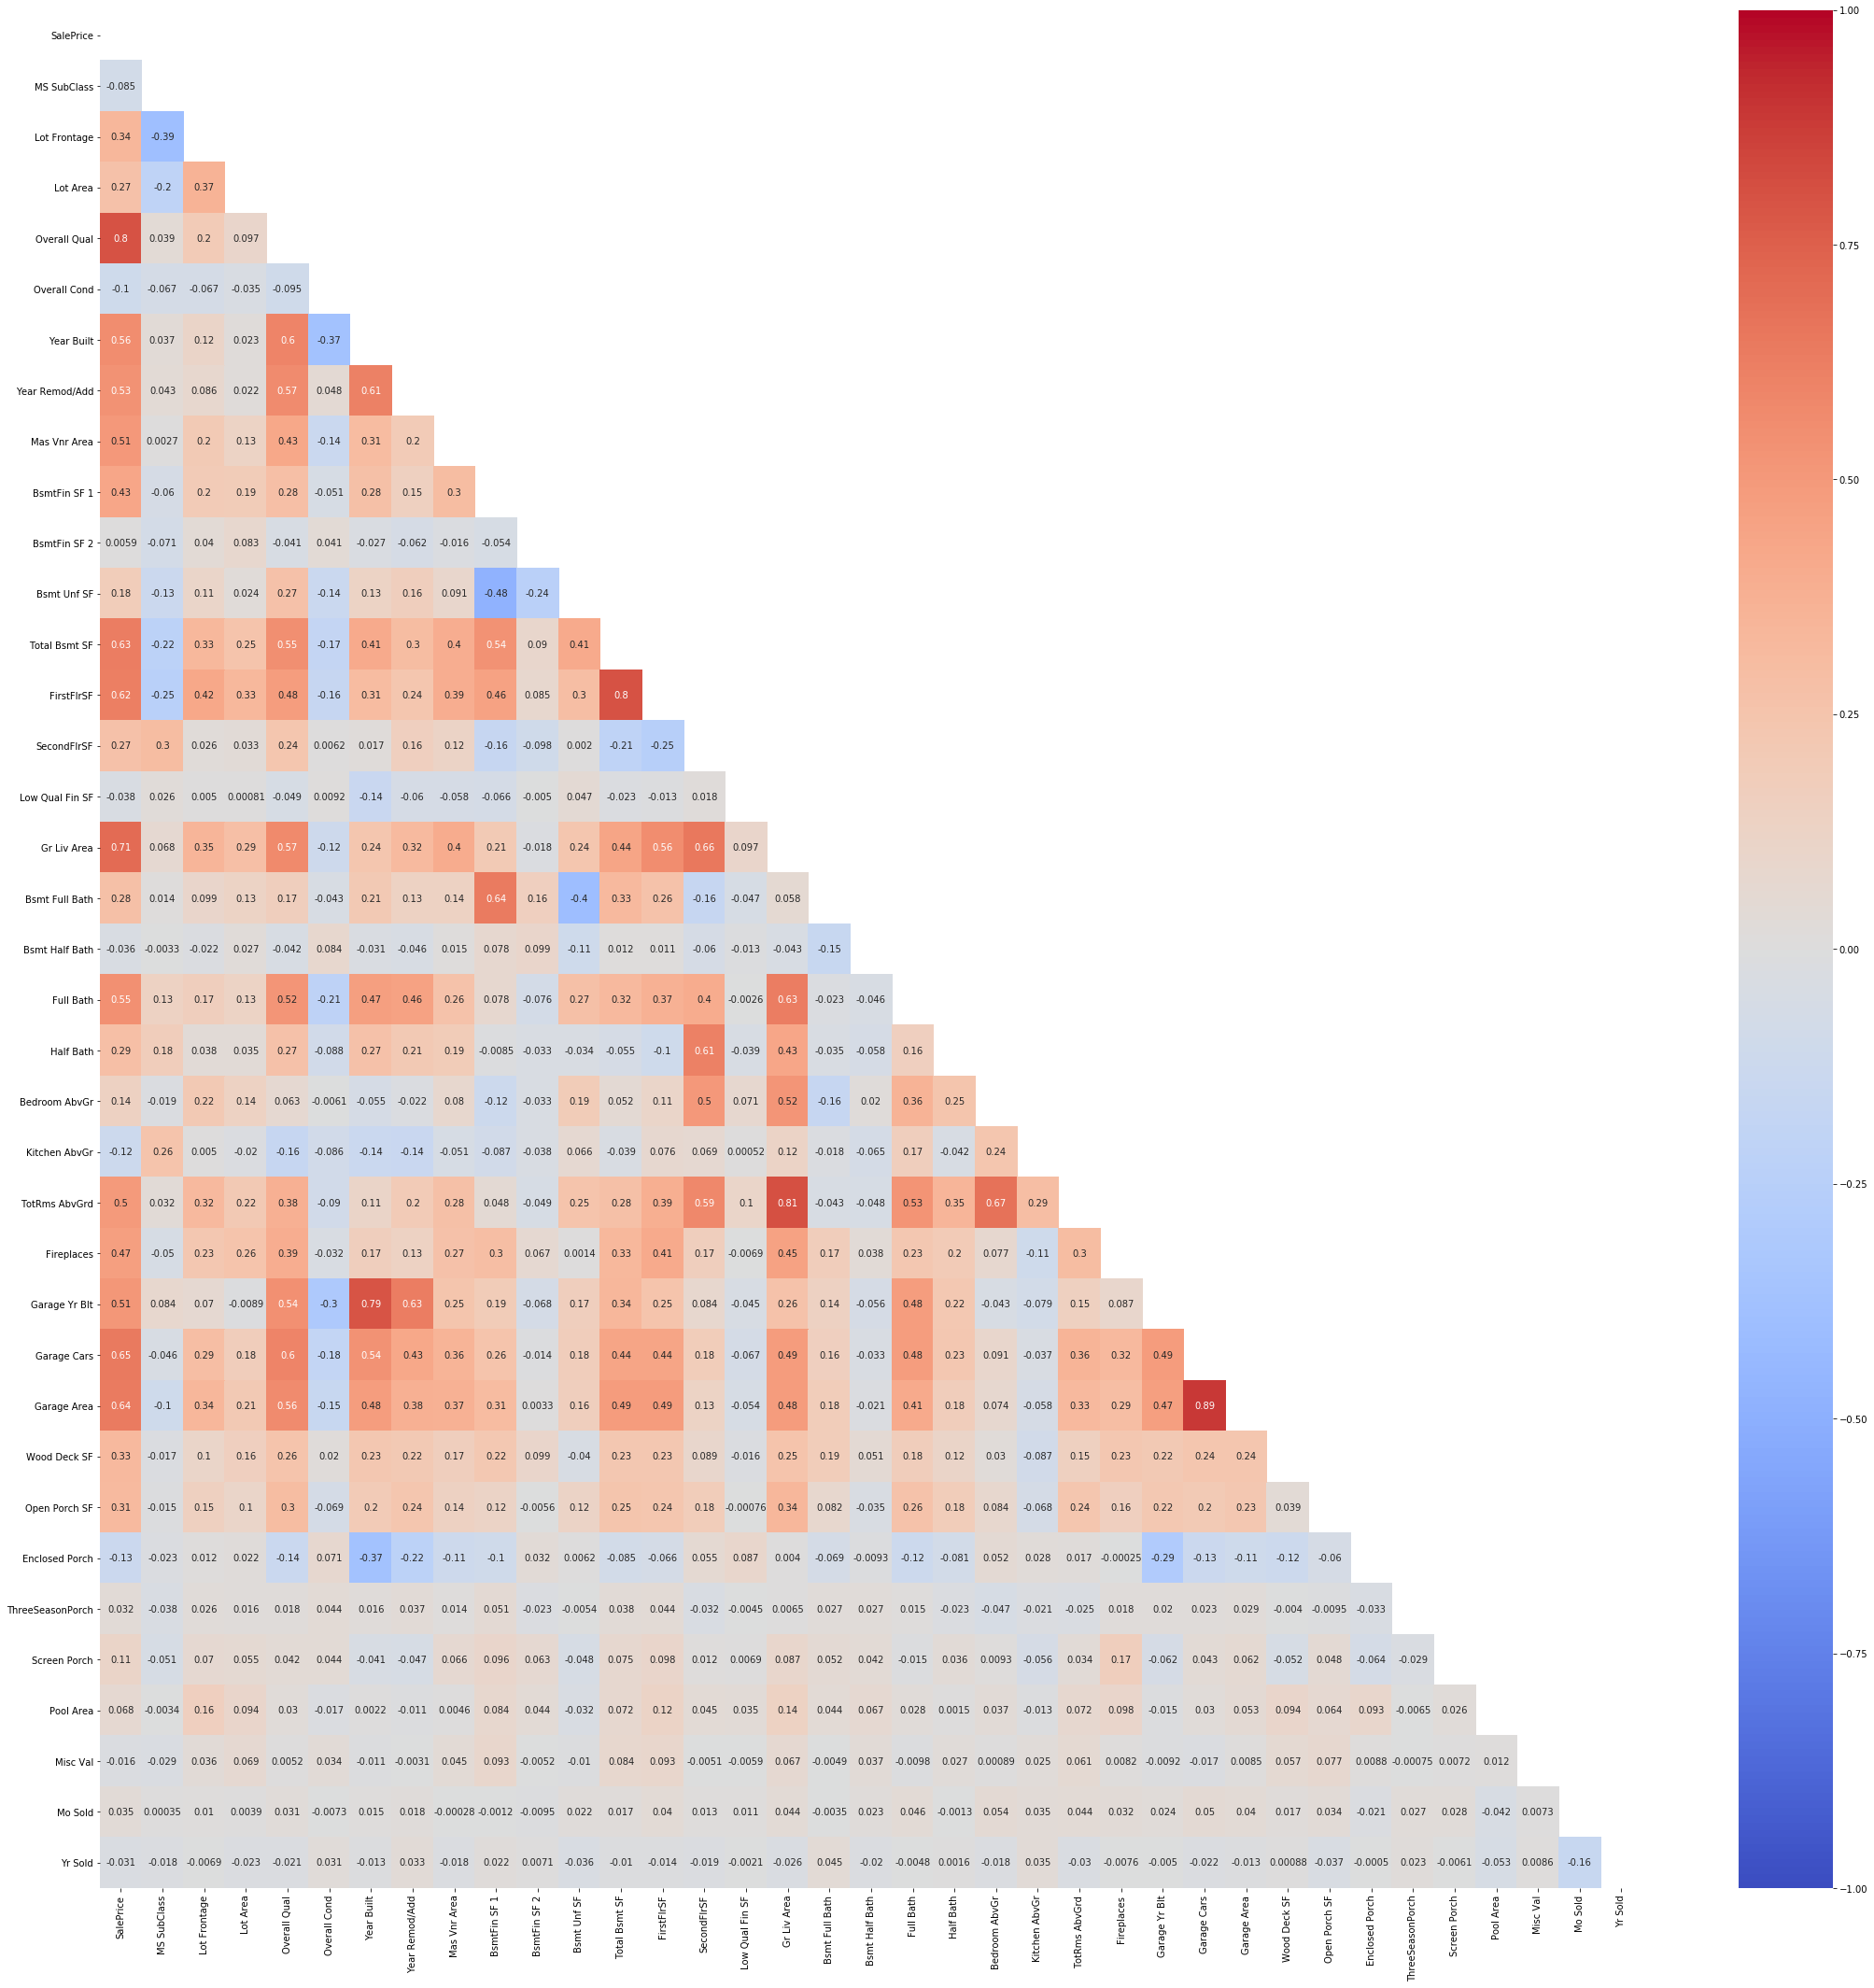

In [24]:
import seaborn as sns

plt.figure(figsize=(37,37)) #need to adjust size as needed.
mask = np.zeros_like(Ames_corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(Ames_corr_matrix,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           mask=mask)
plt.show()

It looks like the target variable SalePrice is Most positively correlated with Overall Quality ( Rates the overall material and finish of the house). Some other variables it is pretty highly positively correlated are Gr Liv Area (Above grade (ground) living area square feet), Garage cars(Size of garage in car capacity), and Garage area (Size of garage in square feet). The variable where there is the most negative correlation are Enclsoed Porch (Enclosed porch area in square feet) and Kitchen AbvGr (Kitchens above grade).

## 	Convert the categorical variables into dummies. 

In [25]:
# perform data transformation. Creates dummy variables for categorical variables. 

for col in Ames.columns[1:]:
	attName = col
	dType = Ames[col].dtype
	missing = pd.isnull(Ames[col]).any()
	uniqueCount = len(Ames[attName].value_counts(normalize=False))
	#create dummies
	if dType == object:
		Ames = pd.concat([Ames, pd.get_dummies(Ames[col], prefix=col)], axis=1)
		del Ames[attName]

In [26]:
#Check new shape with dummies
Ames.shape

(2930, 305)

There are now more rows with dummy variables. Up from 80 to 305

In [27]:
Ames.head()

,SalePrice,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,215000,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,1,0,0,0,0,1,0
1,105000,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
2,172000,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
3,244000,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,1,0,0,0,0,1,0
4,189900,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
Ames.columns

Index(['SalePrice', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=305)

## 	Check to make sure that all columns have integer or float data (i.e. numeric variables) types as scikit-learn will not accept object data type (i.e. categorical variables)

In [70]:
#Check for any missing values. There are none
Ames.columns[Ames.isnull().any()].tolist()

[]

In [29]:
#There are no object datatypes
Ames.loc[:, Ames.dtypes == object]

""
0
1
2
3
4
...
2925
2926
2927
2928


## 	Create a 70% training set and 30% test/validation set.

In [58]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target. (SalePrice)
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    Ames.iloc[:,1:].values, Ames.iloc[:,0].values, test_size=0.30, random_state=0)

In [59]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(2051, 304)
(2051,)
(879, 304)
(879,)


###	Create, build, and validate the following models:
#### 1.	Linear Regression
#### 2.	Ridge Regression
#### 3.	Lasso Regression
#### 4.	Elastic Net
## Be sure to print the model’s estimated regression coefficients and MSE (mean squared error). Add two additional regression error metrics of your choice

## 1. Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

#Step 1: Build a Model
clf_lr = LinearRegression(normalize=True)
clf_lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [61]:
#Step 2: Train the Model
clf_lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [62]:
#Step 3: Validate the Model
# make predictions
predicted = clf_lr.predict(features_test)

In [64]:
#needed to import MSE
from sklearn.metrics import mean_squared_error

In [65]:
# summarize the fit of the model
print("Coef", clf_lr.intercept_, clf_lr.coef_)
print("MSE", mean_squared_error(target_test, predicted))

Coef 3.6946749863179556e+18 [-5.63620454e+01  5.91330816e+01  7.88100863e-01  7.24270929e+03
  5.71302788e+03  3.50105021e+02  2.34666142e+01  2.59920151e+01
 -1.77606031e+14 -1.77606031e+14 -1.77606031e+14  1.77606031e+14
 -3.86738193e+13 -3.86738193e+13 -3.86738193e+13  3.86738193e+13
  2.11181871e+03  1.11538305e+03  1.41903935e+03  5.40524778e+02
 -4.34480834e+03 -9.50688911e+03  9.14223617e+02  6.95292051e+03
 -1.62855654e+00  5.21010652e+03  8.76863105e+00  7.63112469e+00
  5.55077937e+00  1.82718013e+01  1.38620193e+01  4.44418713e+01
 -2.61891112e+02  2.64504814e+00 -1.82048742e+02 -6.64988980e+02
 -4.15163680e+18 -1.37529820e+17 -1.37529820e+17 -1.02988181e+18
 -1.37529820e+17 -1.37529820e+17 -1.37529820e+17 -4.38774303e+17
 -4.38774303e+17  1.76458612e+03 -4.59001816e+03 -2.30883428e+17
 -2.30883428e+17 -2.30883428e+17 -2.30883428e+17  8.01775648e+16
  8.01775648e+16  8.01775648e+16  8.01775648e+16 -1.94175300e+18
 -1.94175300e+18 -1.04940100e+18  1.75175715e+17  1.75175715e+

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
#Two additional regression error metrics I chose are max error and Means absolute error. I did want to see R2 as well.
print("R2", r2_score(target_test, predicted))
print("Max Error", max_error(target_test, predicted))
print("MAE", mean_absolute_error(target_test, predicted))

R2 -9.844610408841433e+24
Max Error 4.317421429000269e+18
MAE 2.5449945796378484e+16


## 2. Ridge Regression

In [71]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [72]:
# Step 1: Build
clf_rg = make_pipeline(StandardScaler(), Ridge(alpha=0.01)) #alpha is lambda (the tuning parameter)!
print(clf_rg) 

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)


In [73]:
# Step 2: Train 
clf_rg.fit(features_train, target_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [74]:
# Step 3: Validate
predicted_rg= clf_rg.predict(features_test)

In [75]:
# summarize the fit of the model

print("Coef", clf_rg['ridge'].intercept_, clf_rg['ridge'].coef_)
print("MSE", mean_squared_error(target_test, predicted_rg))

Coef 180321.64992686492 [-2.21272131e+03  1.54936133e+03  5.93294893e+03  1.04863189e+04
  6.27405802e+03  9.77269567e+03  9.60930641e+02  4.74743248e+03
  9.13128666e+03  2.11897127e+03 -4.60760737e+02  9.84168814e+03
  6.61166000e+03  1.18637418e+04  2.09286671e+02  1.54526508e+04
  1.08515608e+03  3.10287406e+02  1.15750047e+03  6.64913757e+02
 -3.24656676e+03 -1.96816381e+03  1.32369343e+03  4.57723568e+03
  1.09768899e+02  3.24149939e+03  2.48424390e+03  1.04655157e+03
  3.56058498e+02  1.20115531e+03  3.90382828e+02  2.68109320e+03
 -9.10965424e+03  9.17108436e+02 -6.68845335e+02 -9.90860546e+02
 -3.09923079e+02 -6.45045101e+02  1.71685121e+03  1.41473963e+02
  2.07156294e+02  5.22683215e+02 -1.46559936e+03 -5.36481201e+02
  5.36481203e+02 -6.09802306e+01 -7.55755564e+02 -1.21061769e+01
  1.97757724e+02 -4.40503737e+02  1.06036270e+01  6.95719401e+01
  1.35487315e+03 -9.00133024e+02 -4.71106458e+02  2.61235596e+02
 -5.10826789e+02  1.41473963e+02 -3.63570563e+02  1.08509140e+03
 

In [77]:
#Two additional regression error metrics I chose are max error and Means absolute error. I did want to see R2 as well.
print("R2", r2_score(target_test, predicted_rg))
print("Max Error", max_error(target_test, predicted_rg))
print("MAE", mean_absolute_error(target_test, predicted_rg))

R2 0.8191077963280936
Max Error 598763.2942482071
MAE 17092.021536959575


## 3. Lasso Regression

In [109]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [110]:
# Step 1: Build
clf_ls = make_pipeline(StandardScaler(), Lasso(alpha=2, tol=0.01)) #alpha is lambda (the tuning parameter)! #I was receiving error while training and found online that increasing the tol would fix the error
print(clf_ls) 

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.01,
                       warm_start=False))],
         verbose=False)


In [111]:
# Step 2: Train 
clf_ls.fit(features_train, target_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.01,
                       warm_start=False))],
         verbose=False)

In [112]:
# Step 3: Validate
predicted_ls= clf_ls.predict(features_test)

In [84]:
# summarize the fit of the model
print("Coef", clf_ls['lasso'].intercept_, clf_ls['lasso'].coef_)
print("MSE", mean_squared_error(target_test, predicted_ls))

Coef 180321.64992686495 [-2.02653153e+03  1.54509831e+03  5.93326996e+03  1.05072260e+04
  6.26930825e+03  9.80500758e+03  9.50497804e+02  4.76197671e+03
  1.35827767e+04  3.83105376e+03  3.79569723e+03  5.30489149e+03
  1.42819287e+04  2.00576020e+04  1.16639639e+03  5.85544555e+03
  1.08417273e+03  3.04264289e+02  1.13966344e+03  6.68205389e+02
 -3.23231777e+03 -1.93219232e+03  1.32654445e+03  4.53555219e+03
  1.00402446e+02  3.22963703e+03  2.47252087e+03  1.05313492e+03
  3.75017154e+02  1.19621519e+03  3.95751176e+02  2.68646554e+03
 -8.68594329e+03  9.03922712e+02 -6.74885363e+02 -9.87476776e+02
  0.00000000e+00 -6.63617581e+02  1.64214603e+03  0.00000000e+00
  1.74648029e+02  3.82323960e+02 -1.60704307e+03 -1.06193078e+03
  4.29817174e-10 -6.58951096e+01 -7.51529029e+02 -2.89738153e+01
  1.91886335e+02 -4.38716442e+02  0.00000000e+00  3.70501558e+02
  1.65608038e+03 -6.68886441e+02 -0.00000000e+00  0.00000000e+00
 -6.89956168e+02  9.82040203e+01 -4.62455913e+02  1.02131334e+03
 

In [113]:
#Two additional regression error metrics I chose are max error and Means absolute error. I did want to see R2 as well.
print("R2", r2_score(target_test, predicted_ls))
print("Max Error", max_error(target_test, predicted_ls))
print("MAE", mean_absolute_error(target_test, predicted_ls))

R2 0.8206475622801157
Max Error 597598.3817324708
MAE 17054.48900314141


## 4. Elastic Net

In [114]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

In [115]:
# Step 1: Build
clf_en = make_pipeline(StandardScaler(), ElasticNet(alpha=2)) #alpha is lambda (the tuning parameter)!
print(clf_en)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
                 ElasticNet(alpha=2, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)


In [116]:
# Step 2: Train 
clf_en.fit(features_train, target_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
                 ElasticNet(alpha=2, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [117]:
# Step 3: Validate
predicted_en= clf_en.predict(features_test)

In [118]:
# summarize the fit of the model
print("Coef", clf_en['elasticnet'].intercept_, clf_en['elasticnet'].coef_)
print("MSE", mean_squared_error(target_test, predicted_en))

Coef 180321.6499268648 [-1.08970062e+03  1.46701360e+03  2.70336593e+03  5.95751684e+03
  1.92759177e+03  1.48589740e+03  1.91198770e+03  3.74426481e+03
  3.65817353e+03  8.22508385e+02  4.31582778e+02  4.54126744e+03
  4.80383085e+03  2.52253378e+03 -4.67939684e+01  5.95239118e+03
  2.02808342e+03 -6.38980326e+01  2.52069910e+03  1.70048594e+03
  6.68298212e+02 -8.64460378e+02  3.52251095e+03  3.12770123e+03
  1.01498556e+03  3.16083037e+03  3.25118689e+03  1.61178904e+03
  1.22591215e+03  4.22991868e+02  3.25141613e+02  1.75705863e+03
 -3.81748723e+02  1.45027100e+02 -2.23129389e+02 -3.79016511e+02
 -2.38809798e+02 -6.30775632e+02  7.31245826e+02  6.43295262e+01
  1.73095713e+01  6.87118791e+02 -1.04242625e+03 -3.64179253e+02
  3.64179276e+02 -3.15875265e+02 -1.68975394e+01  7.78728852e+02
  5.83708558e+02 -5.40439181e+02 -8.81311084e+02 -3.87364663e+02
  1.38879559e+03  5.53126595e+01 -6.68692272e+02  2.06260020e+02
 -3.57368195e+02  6.43298315e+01 -4.26208977e+02  1.07306019e+03
 -

In [119]:
#Two additional regression error metrics I chose are max error and Means absolute error. I did want to see R2 as well.
print("R2", r2_score(target_test, predicted_en))
print("Max Error", max_error(target_test, predicted_en))
print("MAE", mean_absolute_error(target_test, predicted_en))

R2 0.8295994120969159
Max Error 399306.8514220342
MAE 18238.627034069894


## 4.	Tune the penalty parameter (i.e. alpha in scikit-learn; lambda in most textbooks) for each of the Ridge, Lasso, and Elastic Net models. You should use the grid search with cross validation approach.

### Ridge Tuning

Ran this multiple times commenting out the param_grids I did not want to use. I found the best penalty to use is 10 multiple times

In [122]:

# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [2,10, 20, 50, 100, 500]}
#param_grid={"alpha": [1,10,1]} #this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} #this does a range .01 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(clf_rg['ridge'], param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)

Grid Scores {'mean_fit_time': array([0.05809159, 0.05581255, 0.05424695, 0.06242051, 0.05601215,
       0.04321003]), 'std_fit_time': array([0.00413074, 0.00456947, 0.00669918, 0.01708564, 0.0087668 ,
       0.00640291]), 'mean_score_time': array([0.        , 0.0016006 , 0.00320158, 0.00319939, 0.00320096,
       0.00480075]), 'std_score_time': array([0.        , 0.0032012 , 0.00392112, 0.00391843, 0.00392036,
       0.0039198 ]), 'param_alpha': masked_array(data=[2, 10, 20, 50, 100, 500],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 2}, {'alpha': 10}, {'alpha': 20}, {'alpha': 50}, {'alpha': 100}, {'alpha': 500}], 'split0_test_score': array([0.92990327, 0.9345781 , 0.93548318, 0.93353436, 0.92907131,
       0.90810849]), 'split1_test_score': array([0.91375649, 0.91460603, 0.91487727, 0.91407052, 0.91210761,
       0.89961055]), 'split2_test_score': array([0.75030379, 0.74838351, 0.74463275, 0.736978

After running the Ridge regression with multiple penalties I found that 10 is the best penalty. It results in the lowest MSE and MAE. It also has the best R2. When using higher penalties these metrics worsen.

In [131]:
# Step 1: Build
clf_rg = make_pipeline(StandardScaler(), Ridge(alpha=10)) #Testing with different alphas
print(clf_rg) #use this to see all the steps in your pipeline
# Step 2: Train 
clf_rg.fit(features_train, target_train)

# Step 3: Validate
predicted_rg= clf_rg.predict(features_test)

# summarize the fit of the model

print("Coef", clf_rg['ridge'].intercept_, clf_rg['ridge'].coef_)
print("MSE", mean_squared_error(target_test, predicted_rg))
print("R2", r2_score(target_test, predicted_rg))
print("Max Error", max_error(target_test, predicted_rg))
print("MAE", mean_absolute_error(target_test, predicted_rg))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)
Coef 180321.64992686492 [-1.98322300e+03  1.47169210e+03  5.85735579e+03  1.04696027e+04
  6.14696086e+03  9.12988242e+03  9.94474583e+02  4.81742981e+03
  8.77670492e+03  1.91600738e+03 -5.55821939e+02  9.29922336e+03
  6.95427515e+03  1.10230437e+04  1.73339621e+02  1.49941478e+04
  1.16052234e+03  2.64315806e+02  1.28519062e+03  8.11979516e+02
 -3.04887338e+03 -1.91896759e+03  1.46907492e+03  4.26076676e+03
  1.66859627e+02  3.14793541e+03  2.55404950e+03  1.05415608e+03
  3.85602285e+02  1.18096376e+03  4.17757613e+02  2.70340116e+03
 -5.14163261e+03  8.97299797e+02 -6.77999185e+02 -9.81371915e+02
 -2.75044732e+02

### Lasso Tuning

Ran this multiple times commenting out the param_grids I did not want to use. I found the best penalty to use is 50, 10, or 1.

In [136]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [2,10, 20, 50, 100, 500]}
#param_grid={"alpha": [1,10,1]} #this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} #this does a range .01 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(clf_ls['lasso'], param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)

Grid Scores {'mean_fit_time': array([2.28372345, 0.99051094, 0.57020278, 0.45435038, 0.3886394 ,
       0.17850189]), 'std_fit_time': array([0.44821909, 0.25618412, 0.04043414, 0.05705478, 0.04776703,
       0.05064717]), 'mean_score_time': array([0.00409632, 0.00432606, 0.00392675, 0.00079923, 0.        ,
       0.00312505]), 'std_score_time': array([0.00588189, 0.00580355, 0.0060536 , 0.00159845, 0.        ,
       0.0062501 ]), 'param_alpha': masked_array(data=[2, 10, 20, 50, 100, 500],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 2}, {'alpha': 10}, {'alpha': 20}, {'alpha': 50}, {'alpha': 100}, {'alpha': 500}], 'split0_test_score': array([0.92306409, 0.93183153, 0.93532636, 0.93666925, 0.9365439 ,
       0.92025598]), 'split1_test_score': array([0.91651933, 0.91776957, 0.92042522, 0.9227328 , 0.9215344 ,
       0.89895342]), 'split2_test_score': array([0.73552873, 0.7587643 , 0.75952694, 0.758603

After running the Lasso regression with multiple penalties I found that 50 is the best penalty. It results in the lowest MSE and MAE. It also has the best R2. 

In [140]:
# Step 1: Build
clf_ls = make_pipeline(StandardScaler(), Lasso(alpha=50, tol=0.01)) #alpha is lambda (the tuning parameter)! #I was receiving error while training and found online that increasing the tol would fix the error
print(clf_ls) 
# Step 2: Train 
clf_ls.fit(features_train, target_train)

# Step 3: Validate
predicted_ls= clf_ls.predict(features_test)

# summarize the fit of the model
# Since I use a pipeline, I have to call back up the 'ridge' part of the pipeline to get access to the fitted model
print("Coef", clf_ls['lasso'].intercept_, clf_ls['lasso'].coef_)
print("MSE", mean_squared_error(target_test, predicted_ls))
print("R2", r2_score(target_test, predicted_ls))
print("Max Error", max_error(target_test, predicted_ls))
print("MAE", mean_absolute_error(target_test, predicted_ls))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
                       normalize=False, positive=False, precompute=False,
                       random_state=None, selection='cyclic', tol=0.01,
                       warm_start=False))],
         verbose=False)
Coef 180321.64992686495 [-1.74116396e+03  1.46467183e+03  5.81799904e+03  1.09824205e+04
  6.11425124e+03  1.00243564e+04  1.05053234e+03  4.86049512e+03
  1.13275222e+04  2.74334348e+03  1.68902414e+03  6.49955706e+03
  1.42784009e+04  1.79723293e+04  9.21322523e+02  6.71512222e+03
  9.27907112e+02  4.91003781e+01  9.75636709e+02  5.32675400e+02
 -3.06395011e+03 -1.78431639e+03  1.12940589e+03  3.19474234e+03
  1.69708988e+02  2.92334201e+03  2.39659563e+03  9.54250028e+02
  2.77910190e+02  1.06278336e+03  3.92517402e+02  2.66283628e+03
 -

### Elastic Net Tuning

Ran this multiple times commenting out the param_grids I did not want to use. I found the best penalty to use is 2, 1, or 0.01.

In [150]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
#param_grid = {"alpha": [2,10, 20, 50, 100, 500]}
param_grid={"alpha": [1,10,1]} #this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} #this does a range .01 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(clf_en['elasticnet'], param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)

Grid Scores {'mean_fit_time': array([2.61878462, 2.55752835, 2.39155812]), 'std_fit_time': array([0.09081517, 0.11085574, 0.04700369]), 'mean_score_time': array([0.00312638, 0.00312586, 0.00040073]), 'std_score_time': array([0.00625277, 0.00625172, 0.0004908 ]), 'param_alpha': masked_array(data=[1, 10, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 1}, {'alpha': 10}, {'alpha': 1}], 'split0_test_score': array([0.89791209, 0.83682883, 0.89791209]), 'split1_test_score': array([0.8920931 , 0.84054882, 0.8920931 ]), 'split2_test_score': array([0.70145938, 0.64959359, 0.70145938]), 'split3_test_score': array([0.89585035, 0.84125676, 0.89585035]), 'split4_test_score': array([0.82796213, 0.76713696, 0.82796213]), 'mean_test_score': array([0.84305541, 0.78707299, 0.84305541]), 'std_test_score': array([0.07546986, 0.07425526, 0.07546986]), 'rank_test_score': array([1, 3, 1])}
Best {'alpha': 1}


C:\Users\17857\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 929843556913.8611, tolerance: 1259286518.2456646
  positive)


After running the Lasso regression with multiple penalties I found that 1 is the best penalty. It results in the lowest MSE and MAE. It also has the best R2. 

In [149]:
# Step 1: Build
clf_en = make_pipeline(StandardScaler(), ElasticNet(alpha=1)) #alpha is lambda (the tuning parameter)!
print(clf_en)

# Step 2: Train 
clf_en.fit(features_train, target_train)

# Step 3: Validate
predicted_en= clf_en.predict(features_test)

# summarize the fit of the model
print("Coef", clf_en['elasticnet'].intercept_, clf_en['elasticnet'].coef_)
print("MSE", mean_squared_error(target_test, predicted_en)) 
print("R2", r2_score(target_test, predicted_en))
print("Max Error", max_error(target_test, predicted_en))
print("MAE", mean_absolute_error(target_test, predicted_en))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
                 ElasticNet(alpha=1, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
Coef 180321.64992686483 [-1.32777384e+03  1.41818075e+03  3.33745522e+03  7.04700274e+03
  2.81230063e+03  1.80983356e+03  1.88359112e+03  4.22864362e+03
  4.45549213e+03  1.02242441e+03  2.97386050e+02  5.31397822e+03
  5.62681926e+03  3.15438777e+03 -1.33600916e+02  7.13635619e+03
  2.11659268e+03  3.60315054e+01  2.63972548e+03  1.81404290e+03
  2.59582546e+02 -1.13651448e+03  3.61503181e+03  3.17526207e+03
  8.84171926e+02  3.19819690e+03  3.30183408e+03  1.55094467e+03

## 5.	Report your best model including the tuning parameter (alpha). Justify your decision. (Note: Remember it is up to you to determine what is “best”!)

I believe the best model to use for this dataset is the Elastic Net Regression with the tuning parameter alpha set to 1. Comapred to the other model with their best tuning parameter this model resulted in the lowest Mean squared error, the lowest Max error, and the highest R2 of 0.835. It did have the highest absolute error but not by a whole lot.